In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import means
import means.examples
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [3]:
model = means.examples.MODEL_P53

In [4]:
N_MOMENTS = 2

In [5]:
problem = means.mea_approximation(model, N_MOMENTS)

In [6]:
timepoints = np.arange(0, 50, 0.1)
parameters = [90, 0.002, 1.2, 1.1, 0.8, 0.96, 0.01]
initial_conditions = [80, 40, 60]

In [7]:
means.simulation.Simulation.supported_solvers()

['cvode',
 'dopri5',
 'euler',
 'lsodar',
 'ode15s',
 'radau5',
 'rodas',
 'rungekutta34',
 'rungekutta4']

In [8]:
results = {}
print 'First runtime will be artificially inflated, as the evaluation function is not cached yet'
for solver in means.simulation.Simulation.supported_solvers():
    print solver
    s = means.simulation.Simulation(problem, solver=solver)
    %time results[solver] = s.simulate_system(parameters, initial_conditions, timepoints)
    

First runtime will be artificially inflated, as the evaluation function is not cached yet
cvode
Could not find GLIMDA
CPU times: user 178 ms, sys: 61.1 ms, total: 239 ms
Wall time: 7.23 s
dopri5
CPU times: user 39.8 ms, sys: 596 µs, total: 40.4 ms
Wall time: 41.2 ms
euler
CPU times: user 190 ms, sys: 2.06 ms, total: 192 ms
Wall time: 195 ms
lsodar
CPU times: user 32.1 ms, sys: 1.38 ms, total: 33.4 ms
Wall time: 39.3 ms
ode15s
CPU times: user 9.77 ms, sys: 35 µs, total: 9.8 ms
Wall time: 9.8 ms
radau5
CPU times: user 41.6 ms, sys: 1.12 ms, total: 42.7 ms
Wall time: 46.8 ms
rodas
CPU times: user 146 ms, sys: 1.03 ms, total: 147 ms
Wall time: 151 ms
rungekutta34
CPU times: user 151 ms, sys: 342 µs, total: 152 ms
Wall time: 152 ms
rungekutta4
CPU times: user 866 ms, sys: 2.35 ms, total: 868 ms
Wall time: 868 ms


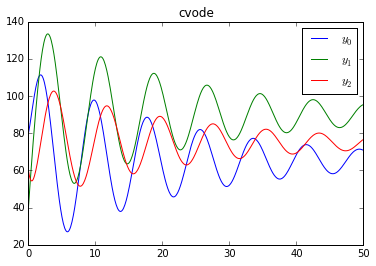

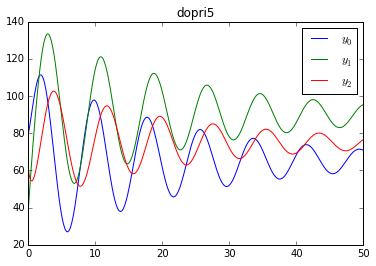

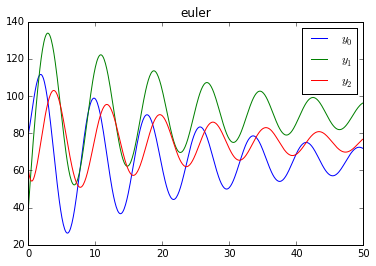

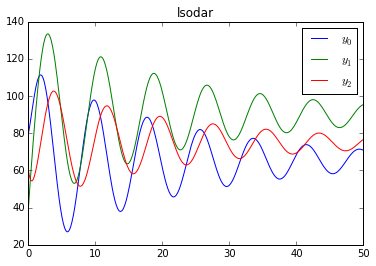

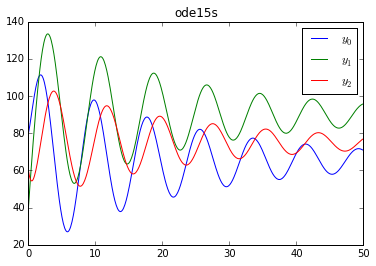

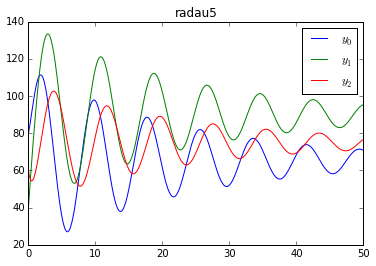

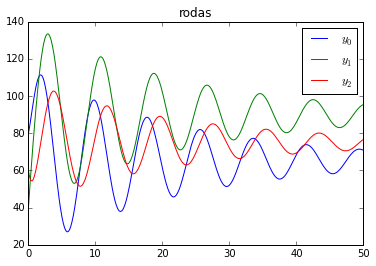

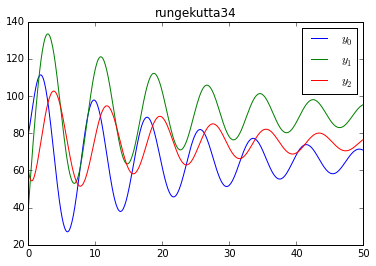

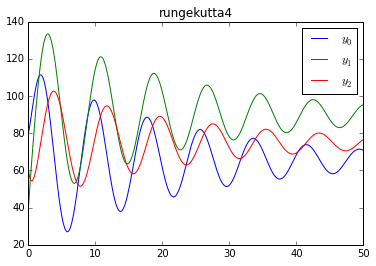

In [9]:
for solver, trajectories in sorted(results.iteritems()):
    plt.figure()
    plt.title(solver)
    
    for trajectory in trajectories:
        if trajectory.description.order == 1:
            trajectory.plot()
    
    plt.legend()

        
    